## Tareas Matematica Aplicada

__Solución de la ecuación del calor por series de Fourier__:

$u(x,t)$: Denota la temperatura a lo largo dde la barra en la posición $x \in [0,L]$ en el instante de tiempo $t$.

\begin{equation}
\begin{cases}
\displaystyle \frac{\partial u}{\partial t}(x,t)=k^2\frac{\partial^2 u}{\partial x^2}(x,t), 
& x\in(0,L),\ t>0,\\[6pt]
u(x,0) = f(x), & x\in[0,L],\\[6pt]
u(0,t) = u(L,t)=0, \quad , &  t \geq 0.
\end{cases}
\end{equation}

nuestra función $f(x)$ está definida por:

\begin{equation}
f(x) =
\begin{cases}
\displaystyle 0 , [0,1]\\[6pt]
x-1, [1,2]\\[6pt]
-2x+5, [2,3]\\[6pt]
x-4, [3,4]\\[6pt]
0, [4,5]\\[6pt]
\end{cases}
\end{equation}

Sea $T=5$, tenemos entonces que la aproximación de $f(x)$ es:
$$f(x)=\sum_{n=1}^{\infty} b_n\sin\!\Big(\frac{2\pi n}{5}x\Big)$$

donde
$$ b_n=\frac{5}{\pi^2 n^2}\Big(-\sin\frac{2\pi n}{5}+3\sin\frac{4\pi n}{5}\Big).$$


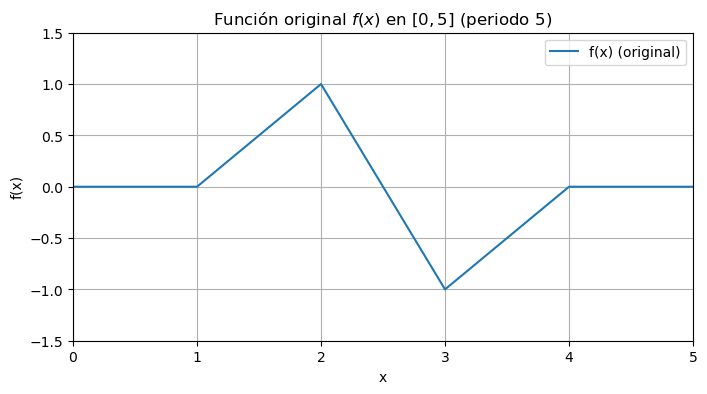

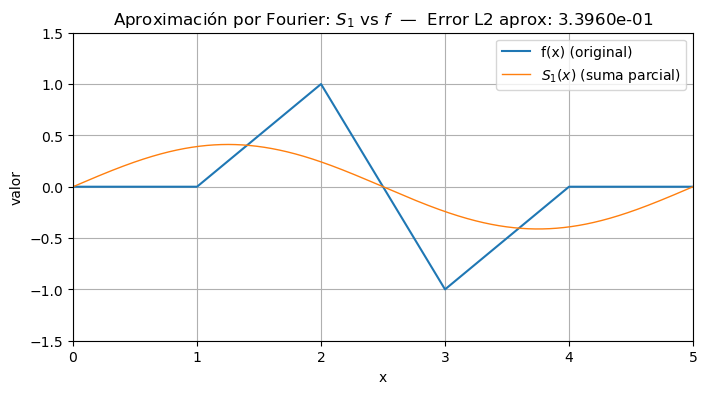

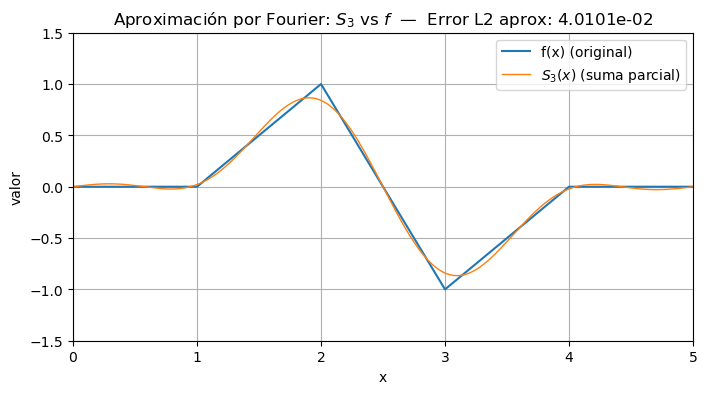

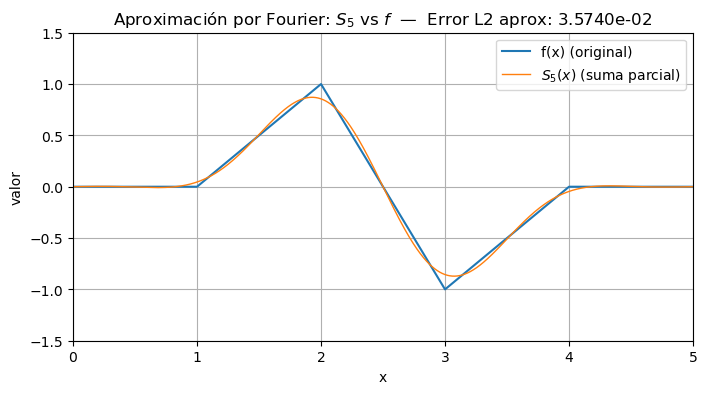

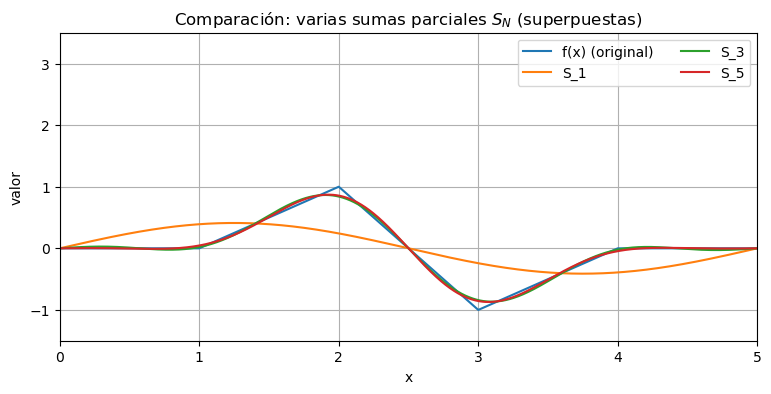

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f_periodic(x):
    # reducir a [0,5) para la periodicidad
    xp = np.mod(x, 5.0)
    y = np.zeros_like(xp)
    # 0 en [0,1]
    mask = (xp >= 0) & (xp < 1)
    y[mask] = 0.0
    # x-1 en [1,2]
    mask = (xp >= 1) & (xp < 2)
    y[mask] = xp[mask] - 1.0
    # -2x+5 en [2,3]
    mask = (xp >= 2) & (xp < 3)
    y[mask] = -2.0*xp[mask] + 5.0
    # x-4 en [3,4]
    mask = (xp >= 3) & (xp < 4)
    y[mask] = xp[mask] - 4.0
    # 0 en [4,5]
    mask = (xp >= 4) & (xp < 5)
    y[mask] = 0.0
    return y

# Parámetros
T = 5.0
omega0 = 2*np.pi / T

# Malla para mostrar la función y las aproximaciones
x_plot = np.linspace(0, 5, 2001)
f_plot = f_periodic(x_plot)

# Malla fina para integrar coeficientes con precisión
x_int = np.linspace(0, 5, 40001)
f_int = f_periodic(x_int)

# Función para calcular coeficientes b_n numéricamente
def compute_bn(n):
    integrand = f_int * np.sin(n * omega0 * x_int)
    return (2.0 / T) * np.trapz(integrand, x_int)

# Calculamos b_n hasta N_max necesario
N_max = 50  # suficiente para ver convergencia y calcular S_N hasta 20 o 50
bn = np.array([compute_bn(n) for n in range(1, N_max+1)])

# Función que construye S_N en una malla x a partir de los coeficientes bn
def partial_sum(bn_array, x):
    # bn_array debe corresponder a n=1..len(bn_array)
    N = len(bn_array)
    S = np.zeros_like(x)
    for k in range(1, N+1):
        S += bn_array[k-1] * np.sin(k * omega0 * x)
    return S

# Valores de N que queremos graficar
Ns_to_plot = [1, 3, 5]

# Grafica la función original (por separado) para referencia
plt.figure(figsize=(8,4))
plt.plot(x_plot, f_plot, label='f(x) (original)', linewidth=1.5)
plt.title('Función original $f(x)$ en $[0,5]$ (periodo 5)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(0,5)
plt.ylim(min(f_plot)-0.5, max(f_plot)+0.5)
plt.grid(True)
plt.legend()
plt.show()

# Graficar S_N superpuesto con la función original en figuras separadas
for N in Ns_to_plot:
    bn_used = bn[:N]
    S_N = partial_sum(bn_used, x_plot)
    # Calcular error L2 (aprox) en la malla
    error_L2 = np.sqrt(np.trapz((f_plot - S_N)**2, x_plot) / (x_plot[-1] - x_plot[0]))
    plt.figure(figsize=(8,4))
    plt.plot(x_plot, f_plot, label='f(x) (original)', linewidth=1.5)
    plt.plot(x_plot, S_N, label=f'$S_{{{N}}}(x)$ (suma parcial)', linewidth=1.0)
    plt.title(f'Aproximación por Fourier: $S_{{{N}}}$ vs $f$  —  Error L2 aprox: {error_L2:.4e}')
    plt.xlabel('x')
    plt.ylabel('valor')
    plt.xlim(0,5)
    plt.ylim(min(f_plot.min(), S_N.min())-0.5, max(f_plot.max(), S_N.max())+0.5)
    plt.grid(True)
    plt.legend()
    plt.show()

plt.figure(figsize=(9,4))
plt.plot(x_plot, f_plot, label='f(x) (original)', linewidth=1.5)
for N in [1,3,5]:
    plt.plot(x_plot, partial_sum(bn[:N], x_plot), label=f'S_{N}')
plt.title('Comparación: varias sumas parciales $S_N$ (superpuestas)')
plt.xlabel('x')
plt.ylabel('valor')
plt.xlim(0,5)
plt.ylim(min(f_plot.min(), -1)-0.5, max(f_plot.max(), 3)+0.5)
plt.grid(True)
plt.legend(ncol=2)
plt.show()

### Generación de las animaciones

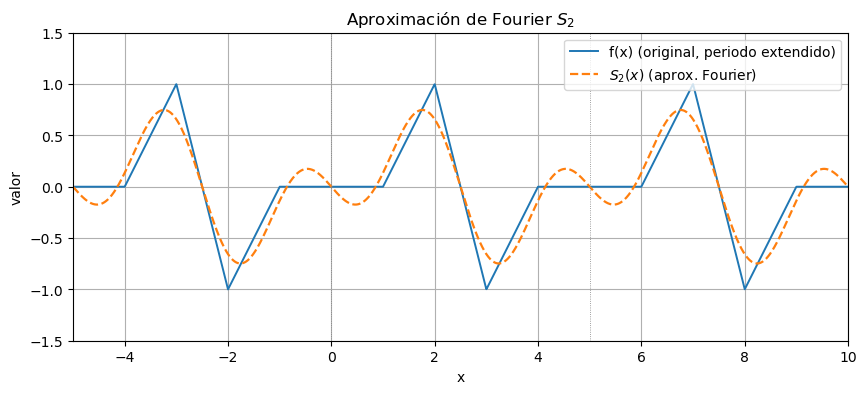

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- tu definición de f_periodic, T, omega0, computación de bn y partial_sum ---
def f_periodic(x):
    xp = np.mod(x, 5.0)
    y = np.zeros_like(xp)
    mask = (xp >= 0) & (xp < 1)
    y[mask] = 0.0
    mask = (xp >= 1) & (xp < 2)
    y[mask] = xp[mask] - 1.0
    mask = (xp >= 2) & (xp < 3)
    y[mask] = -2.0*xp[mask] + 5.0
    mask = (xp >= 3) & (xp < 4)
    y[mask] = xp[mask] - 4.0
    mask = (xp >= 4) & (xp < 5)
    y[mask] = 0.0
    return y

T = 5.0
omega0 = 2*np.pi / T

x_int = np.linspace(0, T, 40001)
f_int = f_periodic(x_int)

def compute_bn(n):
    integrand = f_int * np.sin(n * omega0 * x_int)
    return (2.0 / T) * np.trapz(integrand, x_int)

N_max = 50
bn = np.array([compute_bn(n) for n in range(1, N_max+1)])

def partial_sum(bn_array, x):
    S = np.zeros_like(x)
    for k in range(1, len(bn_array)+1):
        S += bn_array[k-1] * np.sin(k * omega0 * x)
    return S

extra_periods = 1     # periodos
N_plot = 2             # terminos
num_pts = 4001

x_ext = np.linspace(-extra_periods*T, (1+extra_periods)*T, num_pts)  # extensión simétrica alrededor de [0,T]
f_ext = f_periodic(x_ext)
S_ext = partial_sum(bn[:N_plot], x_ext)

# gráfica
plt.figure(figsize=(10,4))
plt.plot(x_ext, f_ext, label='f(x) (original, periodo extendido)', linewidth=1.4, color='tab:blue')
plt.plot(x_ext, S_ext, label=f'$S_{{{N_plot}}}(x)$ (aprox. Fourier)', linewidth=1.6, linestyle='--', color='tab:orange')

# opcional: marcar fronteras de periodos para facilitar visualización
for m in range(int(np.floor(x_ext[0]/T))-1, int(np.ceil(x_ext[-1]/T))+2):
    plt.axvline(m*T, color='gray', linestyle=':', linewidth=0.6)

plt.title(f'Aproximación de Fourier $S_{{{N_plot}}}$')
plt.xlabel('x')
plt.ylabel('valor')
plt.xlim(x_ext[0], x_ext[-1])
ymin = min(f_ext.min(), S_ext.min()) - 0.5
ymax = max(f_ext.max(), S_ext.max()) + 0.5
plt.ylim(ymin, ymax)
plt.grid(True)
plt.legend()
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import os

# --- Definición de la función f ---
def f_on_0_5(x):
    x = np.asarray(x)
    xp = x.copy()
    # x en [0,5]
    y = np.zeros_like(xp, dtype=float)
    # intervalos
    mask = (xp >= 0) & (xp < 1)
    y[mask] = 0.0
    mask = (xp >= 1) & (xp < 2)
    y[mask] = xp[mask] - 1.0
    mask = (xp >= 2) & (xp < 3)
    y[mask] = -2.0*xp[mask] + 5.0
    mask = (xp >= 3) & (xp < 4)
    y[mask] = xp[mask] - 4.0
    mask = (xp >= 4) & (xp <= 5) 
    y[mask] = 0.0
    return y


# --- Parámetros ---
L = 5.0           # Longitud del dominio
k = 1.0           # Coeficiente de difisuón termica
Nterms = 10     # Cantidad de terminos
nx = 400          # Cantidad de puntos espaciales para graficar
x = np.linspace(0, L, nx)
f_x = f_on_0_5(x)

# Malla para integrar
x_int = np.linspace(0, L, 20001)
f_int = f_on_0_5(x_int)

# Calculo del coeficiente B_n
def compute_Bn(n):
    integrand = f_int * np.sin(n * np.pi * x_int / L)
    return (2.0 / L) * np.trapz(integrand, x_int)

B = np.array([compute_Bn(n) for n in range(1, Nterms+1)])  # shape (Nterms,)

# Calculo para el seno
n_vec = np.arange(1, Nterms+1)
sin_basis = np.sin(np.outer(n_vec * np.pi / L, x))  # shape (Nterms, nx)

# Calculo de u(x,t) y ir sumando
def u_xt(t):
    # exponential decay factors for each n at time t
    decay = np.exp(- (n_vec * np.pi * k / L)**2 * t)  # shape (Nterms,)
    u = (B * decay)[:, None] * sin_basis  # (Nterms, nx)
    return u.sum(axis=0)

# Para la animación
t_max = 0.9      # Tiempo máximo
frames = 120     # fotogramas
t_vals = np.linspace(0, t_max, frames)


fig, ax = plt.subplots(figsize=(8,4))
line_u, = ax.plot([], [], lw=1.5, label='u(x,t)')
line_f, = ax.plot(x, f_x, lw=1.0, linestyle='--', label='f(x) (initial)')  
ax.set_xlim(0, L)
ymin = min(f_x.min(), -1.2)
ymax = max(f_x.max(), 1.2)
ax.set_ylim(ymin-0.1, ymax+0.1)
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Ecuación del calor 1D: evolución de u(x,t)')
ax.grid(True)
ax.legend()

def init():
    line_u.set_data([], [])
    return (line_u,)

def animate(i):
    t = t_vals[i]
    u = u_xt(t)
    line_u.set_data(x, u)
    ax.set_title(f'Ecuación del calor 1D — t = {t:.4f}')
    return (line_u,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=50, blit=True)

# --- Guardar animación ---
out_path_mp4 = "animacion.mp4"
out_path_gif = "animacion.gif"
saved_path = None

# Try to save as mp4 with ffmpeg; if fails, fallback to GIF
try:
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=30, bitrate=2000)
    anim.save(out_path_mp4, writer=writer)
    saved_path = out_path_mp4
except Exception as e_mp4:
    try:
        from matplotlib.animation import PillowWriter
        writer = PillowWriter(fps=30)
        anim.save(out_path_gif, writer=writer)
        saved_path = out_path_gif
    except Exception as e_gif:
        saved_path = None
        print("No se pudo guardar la animación automatiquement (faltan encoders).")
        print("Errores:", e_mp4, e_gif)

plt.close(fig)  


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import os

# ------------------------------
# Definición de la función en [0,5] y su extensión periódica
# ------------------------------
def f_on_0_5(x):
    x = np.asarray(x)
    xp = x.copy()
    y = np.zeros_like(xp, dtype=float)
    mask = (xp >= 0) & (xp < 1)
    y[mask] = 0.0
    mask = (xp >= 1) & (xp < 2)
    y[mask] = xp[mask] - 1.0
    mask = (xp >= 2) & (xp < 3)
    y[mask] = -2.0*xp[mask] + 5.0
    mask = (xp >= 3) & (xp < 4)
    y[mask] = xp[mask] - 4.0
    mask = (xp >= 4) & (xp <= 5)
    y[mask] = 0.0
    return y

def f_periodic(x):
    # reduce x al intervalo [0,5) y evalúa f_on_0_5
    xp = np.mod(x, 5.0)
    return f_on_0_5(xp)

# ------------------------------
# Parámetros físicos y numéricos
# ------------------------------
L = 5.0           # longitud del dominio para la ED (y periodo T)
k = 1.0           # coeficiente k en u_t = k^2 u_xx
T = L
omega0 = 2.0 * np.pi / T

# parámetros para la animación / discretización
Nterms_heat = 40        # número de términos para la solución de la ED (B_n)
N_max_bn = 50           # máximo de términos para la serie periódica (bn)
nx = 400                # puntos en x para la ED
x = np.linspace(0, L, nx)
f_x = f_on_0_5(x)

# dominio para integrar con alta resolución (para calcular coeficientes)
x_int = np.linspace(0, L, 40001)
f_int = f_on_0_5(x_int)

# ------------------------------
# Coeficientes B_n para la solución con condiciones de Dirichlet (seno n*pi x/L)
# B_n = (2/L) * ∫_0^L f(x) sin(n*pi*x/L) dx
# ------------------------------
def compute_Bn(n):
    integrand = f_int * np.sin(n * np.pi * x_int / L)
    return (2.0 / L) * np.trapz(integrand, x_int)

n_vec_heat = np.arange(1, Nterms_heat+1)
B = np.array([compute_Bn(n) for n in n_vec_heat])  # shape (Nterms_heat,)

# precomputar la base seno para la ED en los puntos x
sin_basis_heat = np.sin(np.outer(n_vec_heat * np.pi / L, x))  # (Nterms_heat, nx)

def u_xt(t):
    decay = np.exp(- (n_vec_heat * np.pi * k / L)**2 * t)  # k^2 *(nπ/L)^2 * t en exponencial
    u = (B * decay)[:, None] * sin_basis_heat  # (Nterms_heat, nx)
    return u.sum(axis=0)

# ------------------------------
# Coeficientes bn para la serie periódica (periodo T=5):
# bn = (2/T) * ∫_0^T f(x) sin(n*omega0*x) dx
# ------------------------------
x_int_p = np.linspace(0, T, 40001)
f_int_p = f_periodic(x_int_p)

def compute_bn(n):
    integrand = f_int_p * np.sin(n * omega0 * x_int_p)
    return (2.0 / T) * np.trapz(integrand, x_int_p)

n_vec_bn = np.arange(1, N_max_bn+1)
bn = np.array([compute_bn(n) for n in n_vec_bn])

# dominio extendido para visualizar varios periodos
extra_periods = 1
num_pts = 4001
x_ext = np.linspace(-extra_periods*T, (1+extra_periods)*T, num_pts)
f_ext = f_periodic(x_ext)

# precomputar base seno para bn sobre x_ext para eficiencia en la animación
sin_basis_bn_ext = np.sin(np.outer(n_vec_bn * omega0, x_ext))  # (N_max_bn, num_pts)

def partial_sum_from_coeffs(bn_array, sin_basis_subset):
    # bn_array shape (m,), sin_basis_subset shape (m, num_pts)
    return (bn_array[:, None] * sin_basis_subset).sum(axis=0)

# ------------------------------
# Configuración de animación: dos paneles
# ------------------------------
t_max = 0.9      # tiempo máximo para la animación de la ED
frames = 120
t_vals = np.linspace(0, t_max, frames)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8), gridspec_kw={'height_ratios':[1,1]})
plt.tight_layout(pad=3.0)

# --- Ax1: u(x,t) (solución calor en [0,L]) ---
line_u, = ax1.plot([], [], lw=1.8, label='u(x,t)')
line_f0, = ax1.plot(x, f_x, lw=1.0, linestyle='--', label='f(x) (cond. inicial)')
ax1.set_xlim(0, L)
ymin = min(f_x.min(), -1.2)
ymax = max(f_x.max(), 1.2)
ax1.set_ylim(ymin-0.1, ymax+0.1)
ax1.set_xlabel('x')
ax1.set_ylabel('u(x,t)')
ax1.set_title('Ecuación del calor 1D: evolución de u(x,t)')
ax1.grid(True)
ax1.legend(loc='upper right')

# --- Ax2: S_N(x) vs f_periodic (muestra varios periodos) ---
line_S, = ax2.plot([], [], lw=1.6, linestyle='--', label='S_N(x) (suma parcial)')
line_fext, = ax2.plot(x_ext, f_ext, lw=1.2, label='f(x) (periodic)')
ax2.set_xlim(x_ext[0], x_ext[-1])
ymin2 = min(f_ext.min(), -1.2)
ymax2 = max(f_ext.max(), 1.2)
ax2.set_ylim(ymin2-0.2, ymax2+0.2)
ax2.set_xlabel('x')
ax2.set_ylabel('valor')
ax2.set_title('Suma parcial de Fourier periódica (N baja -> alta)')
ax2.grid(True)
ax2.legend(loc='upper right')

# marcar fronteras de periodo para facilitar la lectura
for m in range(int(np.floor(x_ext[0]/T))-1, int(np.ceil(x_ext[-1]/T))+2):
    ax2.axvline(m*T, color='gray', linestyle=':', linewidth=0.6)

def init():
    line_u.set_data([], [])
    line_S.set_data([], [])
    return (line_u, line_S)

def animate(i):
    # tiempo para la ED
    t = t_vals[i]
    u = u_xt(t)
    line_u.set_data(x, u)

    # número de términos N que mostraremos en el panel de Fourier (de 1 a N_max_bn)
    N_current = 1 + int(i * (N_max_bn - 1) / (frames - 1))
    # suma parcial con los primeros N_current términos (usando las bases precomputadas)
    S_ext = partial_sum_from_coeffs(bn[:N_current], sin_basis_bn_ext[:N_current])
    line_S.set_data(x_ext, S_ext)

    # actualizar títulos/etiquetas
    ax1.set_title(f'Ecuación del calor 1D — t = {t:.4f}   (N_terms_heat={Nterms_heat})')
    ax2.set_title(f'Suma parcial periódica $S_{{N}}(x)$ — N = {N_current} / {N_max_bn}')
    return (line_u, line_S)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=60, blit=True)

# ------------------------------
# Guardar animación (mp4 con ffmpeg si está disponible, si no GIF con Pillow)
# ------------------------------
out_path_mp4 = "animacion_calor_y_fourier.mp4"
out_path_gif = "animacion_calor_y_fourier.gif"
saved_path = None

try:
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=5, bitrate=2000)
    anim.save(out_path_mp4, writer=writer)
    saved_path = out_path_mp4
    print("Animación guardada en:", saved_path)
except Exception as e_mp4:
    try:
        from matplotlib.animation import PillowWriter
        writer = PillowWriter(fps=5)
        anim.save(out_path_gif, writer=writer)
        saved_path = out_path_gif
        print("Animación guardada en:", saved_path)
    except Exception as e_gif:
        saved_path = None
        print("No se pudo guardar la animación automáticamente (faltan encoders).")
        print("Errores:", e_mp4, e_gif)

plt.close(fig)


Animación guardada en: animacion_calor_y_fourier.gif


### Fenomeno de Gibbs

El fenómeno de Gibbs es la característica de las sumas parciales de la serie de Fourier de una función con discontinuidades de salto: cerca de cada punto de salto la suma parcial presenta oscilaciones y un sobre-impulso (overshoot) que no desaparece al aumentar el número de términos, aunque las oscilaciones se concentran en una vecindad cada vez más estrecha del salto.

__Teorema__: Sea $f$ una función periodica de perio $2L$, seccionalmente continua y cuya primera derivada sea integrable y absolutamente integrable. Entonces el intervalo de Gibbs de $f$ en el punto de discontinuidad $x_0$ es el conjunto tal que,

$$ |y-\frac{f(x_0 + 0) + f(x_0 - 0)}{2}| \leq \frac{\omega}{\pi} \int_{0}^{\pi} \frac{sen(\tau)}{\tau}\tau$$


donde $\omega = |f(x_0 + 0) - f(x_0-0)|$ es un salto de $f$ en el punto $x_0$ 

### Ejemplo 

$$
% Definición de la onda cuadrada
f(x)=\begin{cases}
1, & 0<x<\pi,\\
-1, & -\pi<x<0,
\end{cases}\quad f(x+2\pi)=f(x)

% Serie de Fourier (armónicos impares)
S_N(x)=\frac{4}{\pi}\sum_{k=0}^{N}\frac{\sin((2k+1)x)}{2k+1}.

$$

In [1]:
# Python code to generate animations showing the Gibbs phenomenon for the square wave.
# This will create two GIFs in /mnt/data:
#  - gibbs_full_domain.gif  : animation of partial Fourier sums on [-pi, pi]
#  - gibbs_zoom_center.gif  : same animation but zoomed around x=0 to highlight Gibbs overshoot
#
# The code follows the requirement to use matplotlib (no seaborn), a single chart per frame,
# and does not explicitly set custom colors or styles.
#
# After running, links to the GIFs will be provided in the chat.
from __future__ import annotations
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

# Parameters
x = np.linspace(-np.pi, np.pi, 2001)
# Square wave: 1 on (0, pi), -1 on (-pi, 0); define value at discontinuities as 0 (midpoint)
sq = np.where(x == 0, 0.0, np.where((x > 0) & (x < np.pi), 1.0, -1.0))

max_k = 50  # number of odd harmonics to include: uses k from 0..max_k (so highest harmonic = 2*max_k+1)
N_frames = max_k + 1

# Precompute the contribution of each odd harmonic to accelerate animation
# terms[k, :] = sin((2k+1)x)/(2k+1)
ks = np.arange(0, max_k + 1)
harmonics = np.outer(2*ks + 1, x)  # shape (max_k+1, len(x))
terms = np.sin(harmonics) / (2*ks[:, None] + 1)  # shape (max_k+1, len(x))

# cumulative sums across k to get partial sums for each N
cumsum_terms = np.cumsum(terms, axis=0)  # shape (max_k+1, len(x))
# Scale factor for the square wave Fourier series (standard)
scale = 4.0 / np.pi
partials = scale * cumsum_terms  # partial sums S_N(x) for N=0..max_k


def make_animation(x, partials, sq, filename, xlim=None, ylim=(-1.5, 1.5), interval=150):
    """
    Create and save an animation (GIF) showing partial Fourier sums approaching the square wave.
    - x: array of x values
    - partials: array shape (N_frames, len(x)) containing partial sums
    - sq: target square wave values
    - filename: output path (GIF)
    - xlim: tuple (xmin, xmax) to zoom; if None use full domain
    - ylim: y-axis limits
    - interval: ms between frames
    """
    fig, ax = plt.subplots(figsize=(8, 3.5))
    ax.set_xlim(xlim if xlim is not None else (x.min(), x.max()))
    ax.set_ylim(ylim)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$S_N(x)$')
    ax.set_title('Aproximaciones parciales de la serie de Fourier de la onda cuadrada\n(Observa el fenómeno de Gibbs cerca de las discontinuidades)')

    # plot target square wave as reference (no custom color)
    ax.plot(x, sq, linestyle='--', linewidth=1.0, label='Onda cuadrada (verdadera)')
    # initial partial sum line
    line, = ax.plot(x, partials[0], linewidth=1.5, label='Suma parcial $S_N$')
    # text to show current N and highest harmonic
    txt = ax.text(0.02, 0.92, '', transform=ax.transAxes, va='top')

    ax.legend(loc='lower right', fontsize='small')

    def update(i):
        line.set_ydata(partials[i])
        N_terms = i + 1  # because i=0 corresponds to first odd harmonic (k=0 -> 1st term)
        highest_harmonic = 2*i + 1
        txt.set_text(f'N = {N_terms} términos (hasta armónico {highest_harmonic})')
        return (line, txt)

    ani = animation.FuncAnimation(fig, update, frames=range(partials.shape[0]), blit=True, interval=interval)
    # save as GIF using PillowWriter
    try:
        writer = animation.PillowWriter(fps=1000/interval)
        ani.save(filename, writer=writer)
    except Exception as e:
        # fallback: try saving as MP4 (may not be available); if fails, re-raise
        mp4name = filename.rsplit('.', 1)[0] + '.mp4'
        try:
            ani.save(mp4name, writer='ffmpeg', fps=1000/interval)
            filename = mp4name
        except Exception as e2:
            plt.close(fig)
            raise RuntimeError(f"Error saving animation: {e}; fallback error: {e2}")
    plt.close(fig)
    return filename


out_full = 'gibbs_full_domain.gif'

# Create animations (full domain and zoomed around x=0)
print("Generando animación (dominio completo)...")
make_animation(x, partials, sq, out_full, xlim=None, ylim=(-1.5, 1.5), interval=150)

Generando animación (dominio completo)...


'gibbs_full_domain.gif'

![Gibbs animacion](gibbs_full_domain.gif)

### Teorema de Fourier

Sea $f:\mathbb{R} \rightarrow \mathbb{R}$ una función seccionalmente diferenciable y de periodo $2L$. Entonces la serie de Fourier de la función $f$ dado por 

$$ f(x)~ \frac{1}{2}a_0 + \sum_{n=1}^{\infty} (a_n cos(\frac{n\pi x}{L}) + b_n sen(\frac{n\pi x}{L}))$$

converge en cada punto de $x$, para $\frac{1}{2}[f(x+0)+f(x-0)]$ esto es 


$$\frac{1}{2}[f(x+0)+f(x-0)] =\frac{1}{2}a_0 + \sum_{n=1}^{\infty} (a_n cos(\frac{n\pi x}{L}) + b_n sen(\frac{n\pi x}{L}))$$


Cualquier función periódica seccionalmente continua, con un número finito de saltos, máximos y mínimos en un periodo se puede escribir como la suma infinita de ondas senoidales y cosenoidales.


### Ejemplo donde se pueda represar una función por diferentes series de fourier, sobre un intervalo [0,L]

Tomemos la función $f(x)=x$, dedfinidda en el intervalo $[0,\pi]$, construyamos la extensión impar de $f$ en $(-\pi,\pi)$. La función periodica resultante queda con un periodo de $2\pi$ nos quedaria solamente como serie dde senos de la siguiente forma,

$$ b_n = \frac{2}{\pi}\int_{0}^{\pi} x sin(nx)dx= [-\frac{xcos(nx)}{n}]_{\pi}^{0} +  \frac{1}{n} \int_{0}^{\pi}cos(nx)dx=  2\frac{(-1)^{n+1}}{n}$$

por otra parte nos queda

$$ x=2\sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n}sin(nx) $$

para $x\in (0,\pi)$

sin embargo si hacer la extensión par sobre $(-\pi,\pi)$ despues de hacer el desarrollo nos queda 


$$ x= \frac{\pi}{2}-\frac{4}{\pi} \sum_{k=0}{\infty} \frac{cos((2k+1)x)}{(2k+1)^2}$$

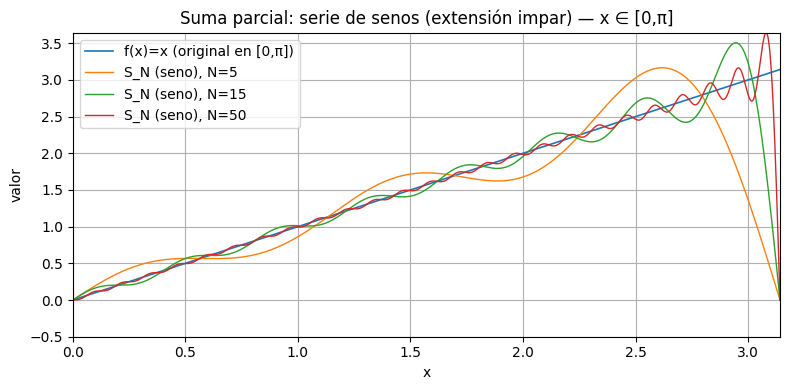

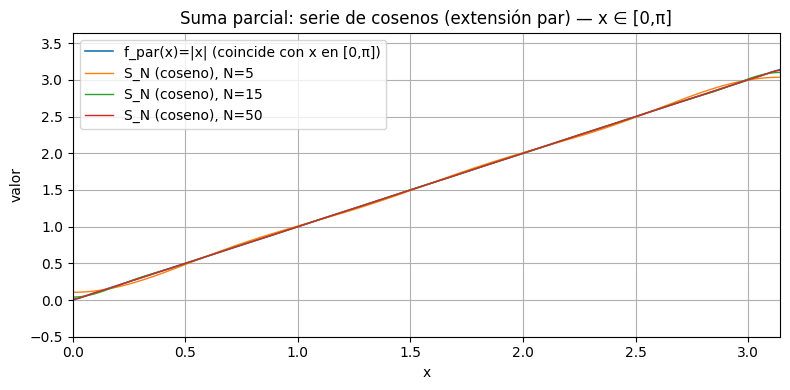

In [3]:
# Código para trazar solo la parte x >= 0 (desde 0 hasta π)
# Compara la expansión por senos (extensión impar) y por cosenos (extensión par)
import numpy as np
import matplotlib.pyplot as plt

# Dominio solo de 0 en adelante (0 .. π)
Npts = 2000
x = np.linspace(0, np.pi, Npts)

# Definiciones de las funciones en [0,π]
f_original = x.copy()    # f(x) = x en [0,π]
f_par = np.abs(x)        # |x| coincide con x en [0,π], se usa para la extensión par

def sine_series_partial(x, N):
    """Suma parcial de la serie de senos (extensión impar)."""
    S = np.zeros_like(x)
    for n in range(1, N+1):
        b_n = 2 * ((-1)**(n+1)) / n
        S += b_n * np.sin(n * x)
    return S

def cosine_series_partial(x, N):
    """Suma parcial de la serie de cosenos (extensión par)."""
    S = np.full_like(x, np.pi/2)  # a0/2
    for n in range(1, N+1):
        if n % 2 == 1:  # n impar
            a_n = -4.0 / (np.pi * n**2)
        else:
            a_n = 0.0
        S += a_n * np.cos(n * x)
    return S

# Valores de N para visualizar la convergencia
Ns = [5, 15, 50]

# 1) Serie de senos - solo x>=0
plt.figure(figsize=(8,4))
plt.plot(x, f_original, label='f(x)=x (original en [0,π])', linewidth=1.2)
for N in Ns:
    plt.plot(x, sine_series_partial(x, N), label=f'S_N (seno), N={N}', linewidth=1)
plt.xlim(0, np.pi)
plt.ylim(np.min(f_original)-0.5, np.max(f_original)+0.5)
plt.title('Suma parcial: serie de senos (extensión impar) — x ∈ [0,π]')
plt.xlabel('x')
plt.ylabel('valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2) Serie de cosenos - solo x>=0
plt.figure(figsize=(8,4))
plt.plot(x, f_par, label='f_par(x)=|x| (coincide con x en [0,π])', linewidth=1.2)
for N in Ns:
    plt.plot(x, cosine_series_partial(x, N), label=f'S_N (coseno), N={N}', linewidth=1)
plt.xlim(0, np.pi)
plt.ylim(np.min(f_par)-0.5, np.max(f_par)+0.5)
plt.title('Suma parcial: serie de cosenos (extensión par) — x ∈ [0,π]')
plt.xlabel('x')
plt.ylabel('valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Revisar un ejemplo de una EDP donde el analisis por series de Fourier se complique

Consideremos la barra de longitud $L$ y la ecuación de calor estandar

\begin{equation}
\begin{cases}
\displaystyle \frac{\partial u}{\partial t}(x,t)=k\frac{\partial^2 u}{\partial x^2}(x,t), 
& x\in(0,L),\ t>0,\\[6pt]
u(x,0) = f(x), & x\in[0,L],\\[6pt]
u(0,t) = u(L,t)=0, \quad , &  t \geq 0.
\end{cases}
\end{equation}

donde $f: [0,L] \rightarrow \mathbb{R}$, recordemos que nuestra solución candidata sería usando separación de variables donde obtenemos 

$$ u(x,t) = \sum_{n=1}^{\infty}c_n e^{-K (\frac{n\pi}{L})^2t} sin (\frac{n\pi x}{L})$$

donde los coeficiente $c_n$ depenen de la condición inicial , sin embargo no tenemos la igualdad de


$$f(x) = \sum_{n=1}^{\infty} sin (\frac{n \pi x}{L})$$


para cualquier $f(x)$ arbitraria, dado que si tomamos una función donde no se anule en los extremos no tendriamos la igualdad, además si f es una función donde tiene saltos o baja regularidad podría darse el caso del fenomeno de gibbs 

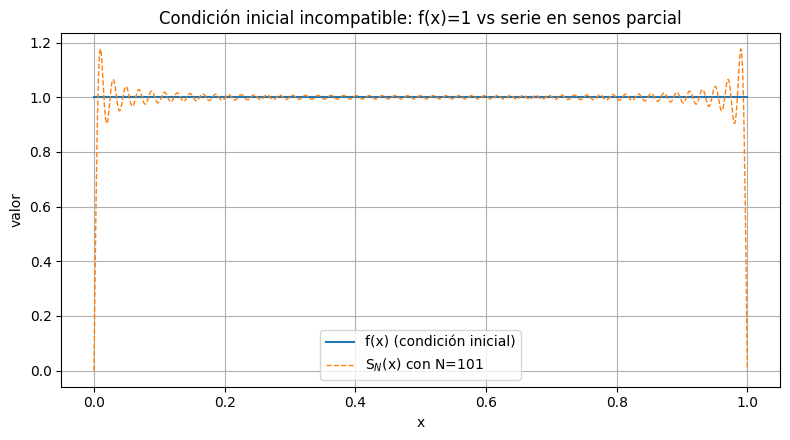

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import os

# Parámetros
L = 1.0
K = 1.0
N = 101  # número de términos de la serie parcial (usar impar para más armónicos impares)
x = np.linspace(0, L, 1001)

# Condición inicial incompatible: f(0)=f(L)=1 (no cumple f(0)=f(L)=0)
def f(x):
    return np.ones_like(x)  # función constante = 1

fx = f(x)

# Calcular coeficientes c_n mediante integración numérica (regla del trapecio)
c = np.zeros(N+1)  # indexamos desde 1..N
for n in range(1, N+1):
    integrand = fx * np.sin(n * pi * x / L)
    c[n] = (2.0 / L) * np.trapz(integrand, x)

# Construir suma parcial S_N(x) (t = 0)
S_N = np.zeros_like(x)
for n in range(1, N+1):
    S_N += c[n] * np.sin(n * pi * x / L)

# Solución de la ecuación del calor u(x,t) para t>0 con los mismos coeficientes
def u_at_t(t):
    u = np.zeros_like(x)
    for n in range(1, N+1):
        u += c[n] * np.exp(-K * (n * pi / L)**2 * t) * np.sin(n * pi * x / L)
    return u

# Elegimos tiempos pequeños para ver cómo la solución "se parece" a la serie inicial
t_small = 0.005
u_tsmall = u_at_t(t_small)

# Guardar primera figura: f(x) vs S_N(x)
fig1, ax1 = plt.subplots(figsize=(8,4.5))
ax1.plot(x, fx, label='f(x) (condición inicial)', linewidth=1.5)
ax1.plot(x, S_N, label=f'S$_{{N}}$(x) con N={N}', linestyle='--', linewidth=1)
ax1.set_xlabel('x')
ax1.set_ylabel('valor')
ax1.set_title('Condición inicial incompatible: f(x)=1 vs serie en senos parcial')
ax1.legend()
ax1.grid(True)
fig1.tight_layout()
path1 = 'heat_series.png'
fig1.savefig(path1, dpi=150)
plt.show()
plt.close(fig1)




### Variable compleja y EDP

\begin{equation}
\begin{cases}
\displaystyle 
u_{xx}+u_{yy}=0,  & y>0, & x \in \mathbb{R}\\[6pt]
u(x,0) = f(x), & x\in \mathbb{R},\\[6pt]
u(x,y) \rightarrow 0, \quad |x| \rightarrow \infty , &  y > 0.
\end{cases}
\end{equation}


tenemos entonces que 

$$ \hat{g}(k) = \int_{-\infty}^{\infty} g(x)e^{-ikx}dx, \quad g(x)=\frac{1}{2\pi} \int_{-\infty}^{\infty} \hat{g}(k)e^{ikx}dk $$




sea $\hat{u}(k,y) = \mathcal{F}_{x}\{ u(\cdot,y) \}(k)$. Transformando $u_{xx}+u_{yy}=0$ respecto a $x$ se tiene que 

$$ (-k^2)\hat{u}(k,y) + \hat{u}_{yy}(k,y) = 0$$

nos quedda una EDO en $y$.

$$ \hat{u}_{yy}(k,y) - k^2 \hat{u}(k,y)=0 $$


$$ \hat{u}(k,y) = A(k)e^{|k|y}+ B(k)e^{-|k|y} $$

la condición de decaimiento cuando $y \rightarrow +\infty$ obligada a $A(k)=0$. Además, imponiendo $y=0$

$$ \hat{u}(k,0)= \hat{f}(k) = B(k) $$


por tanto,


$$ \hat{u}(k,y)= \hat{f}(k)e^{-|k|y} $$

haciendo la transformadda inversa en k nos queda

$$ u(x,y) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{ikx - |k|y} \hat{f}(k) $$
